## Initilization

In [2]:
import seaborn as sns

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

Reading the data into python

In [3]:
chess_dataframe = pd.read_csv("Data\chess.csv")

chess_dataframe.shape

(859370, 12)

# Getting info about our data

Getting info about our data

In [4]:
chess_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859370 entries, 0 to 859369
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   time_control    859370 non-null  object
 1   end_time        859370 non-null  object
 2   rated           859370 non-null  bool  
 3   time_class      859370 non-null  object
 4   rules           859370 non-null  object
 5   gm_username     859370 non-null  object
 6   white_username  859370 non-null  object
 7   white_rating    859370 non-null  int64 
 8   white_result    859370 non-null  object
 9   black_username  859370 non-null  object
 10  black_rating    859370 non-null  int64 
 11  black_result    859370 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 72.9+ MB


In [5]:
chess_dataframe.head(5)

,time_control,end_time,rated,time_class,rules,gm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
0,300+1,2021-06-19 11:40:40,True,blitz,chess,123lt,vaishali2001,2658,win,123lt,2601,resigned
1,300+1,2021-06-19 11:50:06,True,blitz,chess,123lt,123lt,2627,win,vaishali2001,2649,resigned
2,300+1,2021-06-19 12:01:17,True,blitz,chess,123lt,vaishali2001,2641,timeout,123lt,2649,win
3,300+1,2021-06-19 12:13:05,True,blitz,chess,123lt,123lt,2629,timeout,vaishali2001,2649,win
4,300+1,2021-06-19 12:28:54,True,blitz,chess,123lt,vaishali2001,2657,win,123lt,2611,resigned


Getting a sub-dataframe that include the result as well as colour



In [6]:
win_result_df = chess_dataframe.iloc[:,6:]

win_result_df.head(5)

,white_username,white_rating,white_result,black_username,black_rating,black_result
0,vaishali2001,2658,win,123lt,2601,resigned
1,123lt,2627,win,vaishali2001,2649,resigned
2,vaishali2001,2641,timeout,123lt,2649,win
3,123lt,2629,timeout,vaishali2001,2649,win
4,vaishali2001,2657,win,123lt,2611,resigned


Check differeces between the black and white side

In [7]:
len(win_result_df["white_username"].explode().unique()) # A lot of different users - 37943 users

white_win_ratio = (win_result_df["white_result"] == "win").sum() / win_result_df.shape[0] * 100

win_result_df["white_result"].value_counts() - win_result_df["black_result"].value_counts() # check differences for the 2 side.



win                    37355
resigned              -29152
timeout                -1461
checkmated             -7596
repetition                 0
agreed                     0
insufficient               0
timevsinsufficient         0
bughousepartnerlose      626
stalemate                  0
abandoned                223
50move                     0
threecheck                 7
kingofthehill             -2
dtype: int64

In [14]:
# make a new column called "win" which takes the result from white and black and put it together

chess_dataframe.loc[chess_dataframe['white_result'] == "win",'win'] = 'white'
chess_dataframe.loc[chess_dataframe['black_result'] == "win",'win'] = 'black'

# all those that are draws will also be filled out with

chess_dataframe['win']=chess_dataframe['win'].fillna("draw")


## Using SQL to get some fun data out

## PLOTTING SECTION

<AxesSubplot:xlabel='count', ylabel='time_class'>

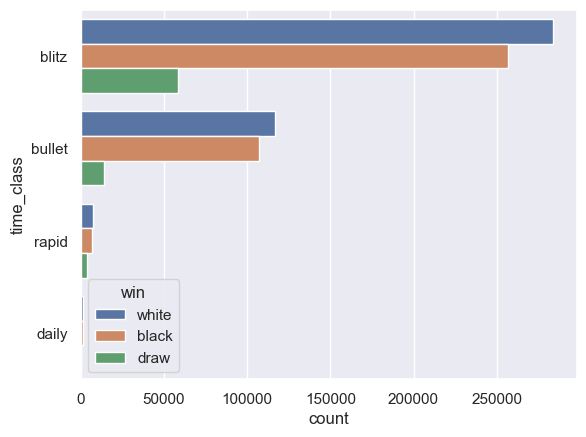

In [16]:
sns.set_theme(style="darkgrid") # using a theme

sns.countplot(y='time_class',hue='win',data=chess_dataframe)